In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris().data

In [3]:
iris = pd.DataFrame(iris)

In [4]:
iris.columns = load_iris().feature_names

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def plot_data(X, cluster_label):
    return sns.lmplot(
        data = X,
        x = X.columns[0],
        y = X.columns[1],
        hue = cluster_label,
        fit_reg = False,
        legend = False        
    )

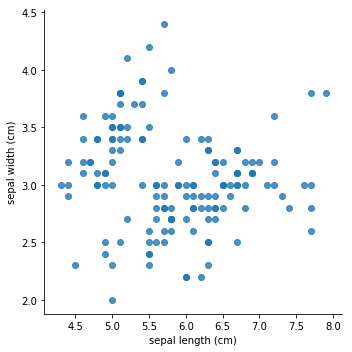

In [8]:
plot_data(iris, None)
plt.show()

In [9]:
k = 10

In [10]:
def centroids_func(X, k):
    initial_centroids = X.sample(n = k)
    
    initial_centroids.index = np.arange(1, k + 1)
    return initial_centroids

In [11]:
centroids = centroids_func(iris, k)
centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,6.9,3.1,5.4,2.1
2,7.7,3.0,6.1,2.3
3,5.7,3.8,1.7,0.3
4,6.4,3.1,5.5,1.8
5,5.0,2.3,3.3,1.0
6,4.9,3.0,1.4,0.2
7,7.0,3.2,4.7,1.4
8,6.0,3.4,4.5,1.6
9,5.9,3.0,4.2,1.5
10,6.6,3.0,4.4,1.4


In [12]:
def plot_centroids(figure, U):
    figure.ax.scatter(
        x = U['sepal length (cm)'],
        y = U['sepal width (cm)'],
        color = 'red',
        marker = 'x'
    )

In [13]:
# dispalying the position of each centroid in scatterplot

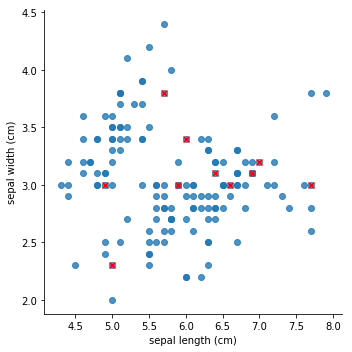

In [14]:
dot_plot = plot_data(iris, None)
plot_centroids(dot_plot, centroids)

In [15]:
# Euclidean distance between it and every centroid.

In [16]:
def assign_cluster(X, U):
    m = len(X)
    
    C = pd.DataFrame(np.empty(m), columns = ['label'])
    
    for (i, example) in X.iterrows():
        distance = (example - U).apply(np.linalg.norm, axis = 1)
        C.loc[i] = (distance ** 2).idxmin()
        
    return C

In [17]:
# lets assign training examples from above to cluster  and look at them

In [18]:
labels = assign_cluster(iris, centroids)

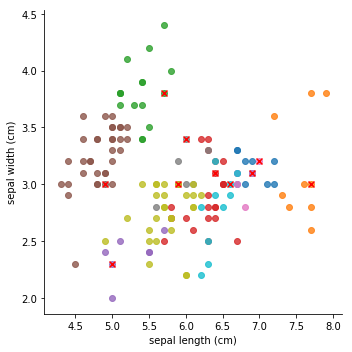

In [19]:
dot_plot = plot_data(pd.concat((iris, labels), axis = 1), 'label')
plot_centroids(dot_plot, centroids)

In [20]:
# lets look at the position of new centroid

In [21]:
def updated_centroid(X, C):
    joined = pd.concat((X, C), axis = 1)
    
    return joined.groupby('label').mean()

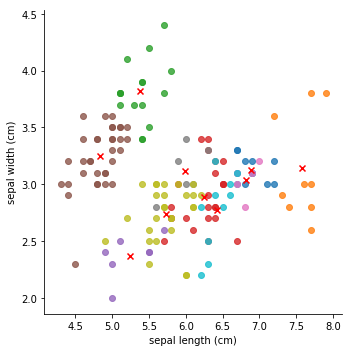

In [22]:
centroids = updated_centroid(iris, labels)

dot_plot = plot_data(pd.concat((iris, labels), axis = 1), 'label')
plot_centroids(dot_plot, centroids)

In [23]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

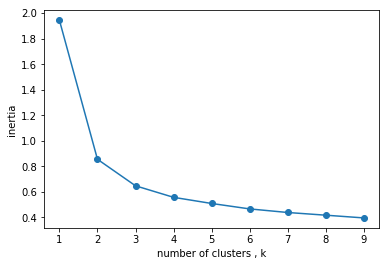

In [24]:
ks = range(1, 10)
inertia = []

for i in ks:
    model = KMeans(n_clusters= i).fit(iris)
    
    model.fit(iris)
    
    inertia.append(sum(np.min(cdist(iris, model.cluster_centers_, 'euclidean'), axis = 1))/iris.shape[0])
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters , k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(iris, labels, metric='euclidean')

/home/m/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.24513492670097317

In [26]:
# let's pick 3 cluster

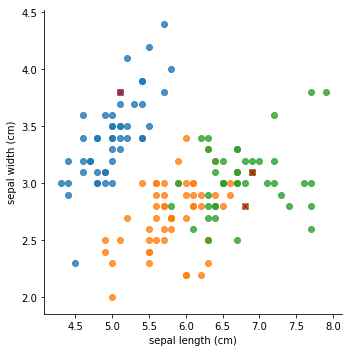

In [48]:
dot_plot = plot_data(pd.concat((iris, assign_cluster(iris, centroids_func(iris, 3))), axis = 1), 'label')
plot_centroids(dot_plot, centroids_func(iris, 3))

In [28]:
def plot_data1(X, cluster_label):
    return sns.lmplot(
        data = X,
        x = X.columns[1],
        y = X.columns[2],
        hue = cluster_label,
        fit_reg = False,
        legend = False        
    )

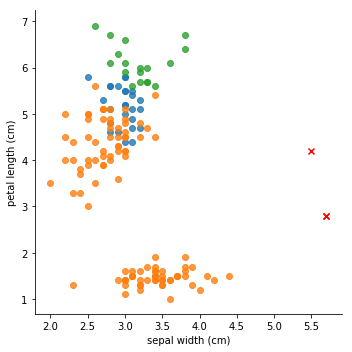

In [45]:
dot_plot = plot_data1(pd.concat((iris, assign_cluster(iris, centroids_func(iris, 3))), axis = 1), 'label')
plot_centroids(dot_plot, centroids_func(iris, 3))

In [30]:
from mpl_toolkits import mplot3d

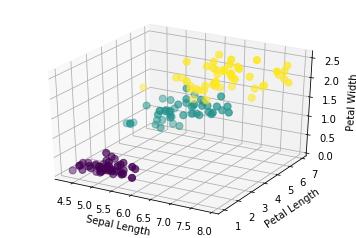

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xs = iris['sepal length (cm)']
ax.set_xlabel('Sepal Length')
ys = iris['petal length (cm)']
ax.set_ylabel('Petal Length')
zs = iris['petal width (cm)']
ax.set_zlabel('Petal Width')
ax.scatter(xs, ys, zs, s = 50, c = load_iris().target)
plt.show()

In [32]:
# with sklearn kmeans 

In [39]:
model = KMeans(n_clusters= 3)

In [40]:
model.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
model.predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

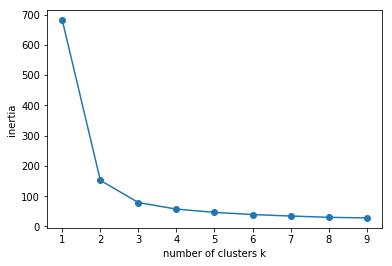

In [42]:
ks = range(1, 10)
inertia = []

for i in ks:
    models = KMeans(n_clusters= i)
    
    models.fit(iris)
    
    inertia.append(models.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

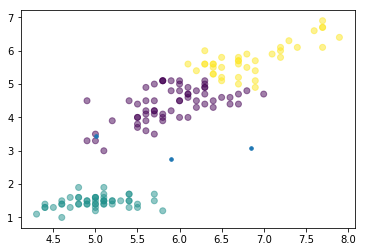

In [43]:
plt.scatter(iris['sepal length (cm)'], iris['petal length (cm)'], c = model.predict(iris), alpha = 0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker= '.', s = 50)
zs = iris['petal width (cm)']

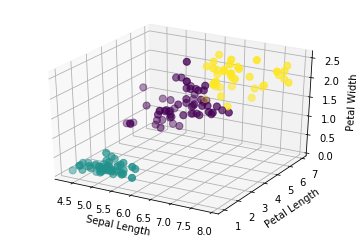

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xs = iris['sepal length (cm)']
ax.set_xlabel('Sepal Length')
ys = iris['petal length (cm)']
ax.set_ylabel('Petal Length')
zs = iris['petal width (cm)']
ax.set_zlabel('Petal Width')
ax.scatter(xs, ys, zs, s = 50, c = model.predict(iris))
plt.show()